# Bibliotecas

In [1]:
# Comando básico para importar bibliotecas: import ...
# Por exemplo:
import sys
import math

# Usando função da biblioteca
math.ceil(1.6) # função de arredondar "pra cima"

2

In [2]:
# Há outras opções também:

# 1) Importar uma função específica: from ... import ___
from time import localtime

# Usando função da biblioteca
localtime() # função que reporta o horário local

time.struct_time(tm_year=2023, tm_mon=11, tm_mday=29, tm_hour=23, tm_min=52, tm_sec=2, tm_wday=2, tm_yday=333, tm_isdst=0)

In [4]:
# 2) Importar biblioteca e "renomeá-la": import ... as ___
import random as rnd
rnd.randint(1, 100) # função que retorna valor aleatório no intervalo entre os valores

30

In [3]:
# 3) Importando várias blibliotecas de uma vez: import ..., ..., ...
import statistics, sys

print(statistics.mean([1, 2, 3, 4, 5]))
print(sys.platform)
print(sys.executable)

3
linux
/home/codespace/.python/current/bin/python3


In [4]:
# 4) Importar função específica de uma biblioteca e renomear a função: from ... import ___ as ,,,
from statistics import median as med

# Usando a função renomeada
med([1, 2, 3, 4, 5])

3

In [5]:
# Comando para instalar bibliotecas: !{sys.executable} -m pip install nome_da_biblioteca
# Veja lista de bibliotecas em: https://pypi.org/

# Por exemplo:
!{sys.executable} -m pip install pandas

import pandas as pd
dados = pd.Series(  # gerar um objeto de série de valores
    data = [1, 2, 3, 4, 5], 
    index = ["a", "b", "c", "d", "e"]
    )
dados

a    1
b    2
c    3
d    4
e    5
dtype: int64

# Diretório de trabalho

In [6]:
# Em qual pasta do computador o Python está "operante"?
import os
os.getcwd()

'/workspaces/codespaces-jupyter/notebooks'

In [10]:
# Printa o caminho do diretório de trabalho atual.
print(os.getcwd())

/workspaces/codespaces-jupyter/notebooks


In [9]:
# Cria uma pasta com nome "temporaria" dentro da pasta existente "content"
os.mkdir("/content/temporaria") # no Windows localmente use: "./content/temporaria"

# Muda o diretório para a pasta criada
os.chdir("/content/temporaria") # no Windows localmente use: "./content/temporaria"
print(os.getcwd())

# Retorna ao diretório original
os.chdir("../") # no Windows localmente use: "../../"
print(os.getcwd())

/content
/content/temporaria
/content


# Documentações

In [7]:
# Use a função help() para imprimir a documentação de lago diretamente
help(os.chdir)

Help on built-in function chdir in module posix:

chdir(path)
    Change the current working directory to the specified path.
    
    path may always be specified as a string.
    On some platforms, path may also be specified as an open file descriptor.
      If this functionality is unavailable, using it raises an exception.



In [8]:
# Ou use um ponto de interrogação ao final
os.chdir?

Signature: os.chdir(path)
Docstring:
Change the current working directory to the specified path.

path may always be specified as a string.
On some platforms, path may also be specified as an open file descriptor.
  If this functionality is unavailable, using it raises an exception.
Type:      builtin_function_or_method

In [ ]:
# Ao digitar um função e abrir parênteses, se necessário, use Ctrl+Shift+Space bar
# para listar uma documentação em uma janela pop-up
pd.Series(

# Dados

Agora vamos importar o arquivo CSV de dados com a biblioteca *pandas* salvando o resultando em um objeto com nome "dados" (no Python o operador "=" significa "atribuição", ou seja, atribuir um resultado/valor a um objeto, salvando-o)

In [14]:
# Opção 1: importar de uma pasta no computador
# Importante: a localização do CSV deve ser indicada a partir do diretório atual
dados = pd.read_csv(filepath_or_buffer = "../data/dados.csv")  # esse é o caminho p/ o arquivo (Windows: "./content/dados/dados.csv")
dados # "ver" os dados importados

,data,salario_minimo,inpc
0,2000-01-01,136,1598.24
1,2000-02-01,136,1599.04
2,2000-03-01,136,1601.12
3,2000-04-01,151,1602.56
4,2000-05-01,151,1601.76
...,...,...,...
259,2021-08-01,1100,6087.84
260,2021-09-01,1100,6160.89
261,2021-10-01,1100,6232.36
262,2021-11-01,1100,6284.71


In [13]:
# Opção 2: importar do site da Análise Macro
dados = pd.read_csv(filepath_or_buffer = "https://analisemacro.com.br/download/38675/")  # URL
dados # outra forma de ver os dados é clicando em {x} na barra lateral esquerda (Google Colab) para abrir o painel de "Variables"

,data,salario_minimo,inpc
0,2000-01-01,136,1598.24
1,2000-02-01,136,1599.04
2,2000-03-01,136,1601.12
3,2000-04-01,151,1602.56
4,2000-05-01,151,1601.76
...,...,...,...
259,2021-08-01,1100,6087.84
260,2021-09-01,1100,6160.89
261,2021-10-01,1100,6232.36
262,2021-11-01,1100,6284.71


# Tipos de dados

In [14]:
# Obter o tipo do objeto
type(dados)

pandas.core.frame.DataFrame

In [15]:
# Obter os atributos do objeto
vars(dados)

{'_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>,
 '_is_copy': None,
 '_item_cache': {},
 '_mgr': BlockManager
 Items: Index(['data', 'salario_minimo', 'inpc'], dtype='object')
 Axis 1: RangeIndex(start=0, stop=264, step=1)
 NumericBlock: slice(1, 2, 1), 1 x 264, dtype: int64
 NumericBlock: slice(2, 3, 1), 1 x 264, dtype: float64
 ObjectBlock: slice(0, 1, 1), 1 x 264, dtype: object}

# Deflacionando

In [16]:
# Agora vamos implementar o deflacionamento do salário mínimo pelo INPC
# Data-base: dezembro de 2021

# A expressão "dados["real"] = " indica que estamos criando uma coluna com nome
# "real" no objeto "dados" que é um DataFrame

# Após o igual (=) definimos a série de valores que será armazenada na nova coluna
# A série é determinada pela expressão matemática de deflacionamento de valores

# Os parênteses não são necessários, mas podem ser colocados para organização

# A expressão dados["inpc"] acessa os valores dessa coluna na tabela e ".iloc[-1]"
# serve para acessar apenas o último valor dessa coluna, com base no índice da linha
# (iloc), formando o numerador da expressão

# O denominador da expressão é definido após o operador de divisão: / dados["inpc"]

# Por fim, multiplicamos o resultado do fator de deflacionamento pela coluna de 
# valores nominais com: * dados["salario_minimo"]

dados["real"] = (dados["inpc"].iloc[-1] / dados["inpc"]) * dados["salario_minimo"]
dados

,data,salario_minimo,inpc,real
0,2000-01-01,136,1598.24,538.692712
1,2000-02-01,136,1599.04,538.423204
2,2000-03-01,136,1601.12,537.723743
3,2000-04-01,151,1602.56,596.495039
4,2000-05-01,151,1601.76,596.792959
...,...,...,...,...
259,2021-08-01,1100,6087.84,1143.862027
260,2021-09-01,1100,6160.89,1130.299194
261,2021-10-01,1100,6232.36,1117.337413
262,2021-11-01,1100,6284.71,1108.030283


# Visualizando dados
Vamos gerar um gráfico de linha com os resultados?

Text(0.99, -0.02, 'Dados: IBGE/IPEADATA | Elaboração: analisemacro.com.br')

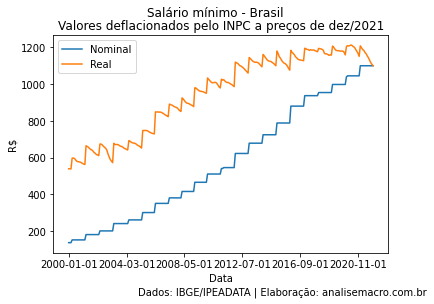

In [17]:
from matplotlib import pyplot as plt

axes = plt.gca() # cria um objeto de eixos

dados.plot(x = "data", y = ["salario_minimo", "real"], kind = "line", ax = axes) # cria um gráfico de linha definindo os eixos e passando o objeto de eixos
plt.title("Valores deflacionados pelo INPC a preços de dez/2021") # define texto de título no gráfico criado
plt.suptitle("Salário mínimo - Brasil") # define texto de subtítulo
plt.xlabel("Data")  # define texto no eixo X
plt.ylabel("R$")  # define texto no eixo Y
plt.legend(["Nominal", "Real"])  # define nome das séries na legenda
plt.figtext(   # adiciona texto de fonte (caption) nas coordenadas x e y
    x = 0.99, 
    y = -0.02,
    s = "Dados: IBGE/IPEADATA | Elaboração: analisemacro.com.br", 
    horizontalalignment = "right"
    )